Acurácia RandomForestClassifier: 100.00%
Acurácia KNeighborsClassifier: 100.00%

Relatório de Classificação - RandomForestClassifier:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Relatório de Classificação - KNeighborsClassifier:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

+----+-------+--------------------------------+
|    |   Ano |   Previsao_Casos_Dengue_Linear |
+====+=======+================================+
|  0 |  2022 |                    1.39383e+06 |
+----+-------+--------------------------------+
|  0 |  2021 |              

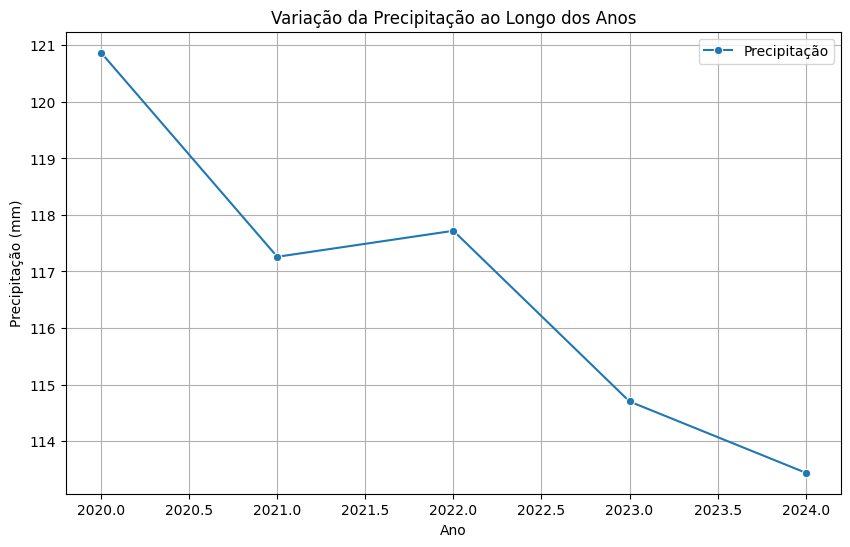

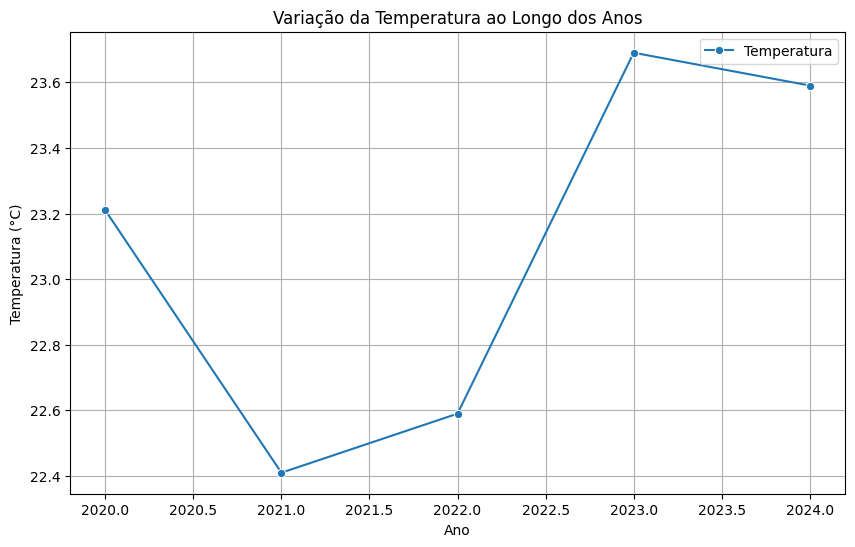

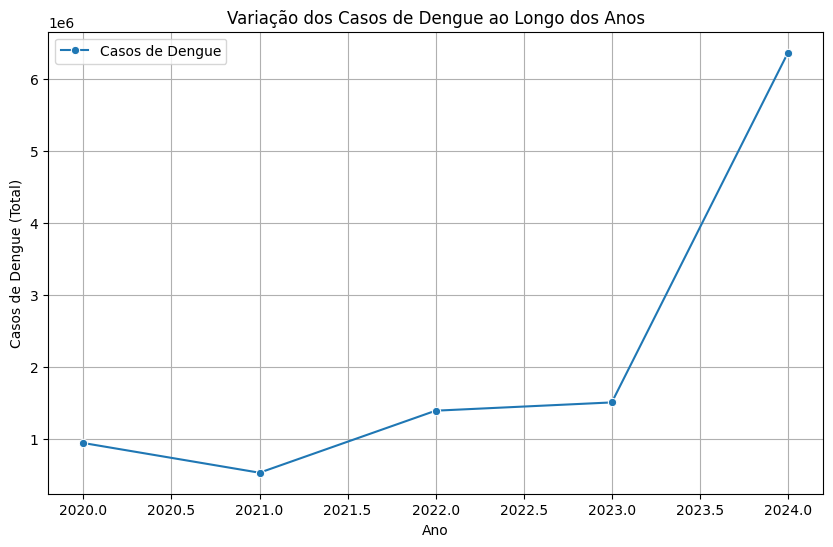

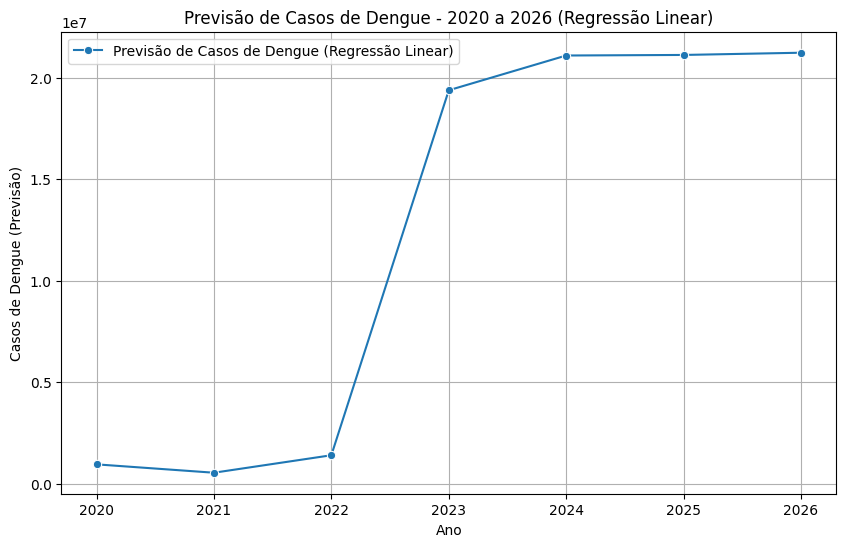

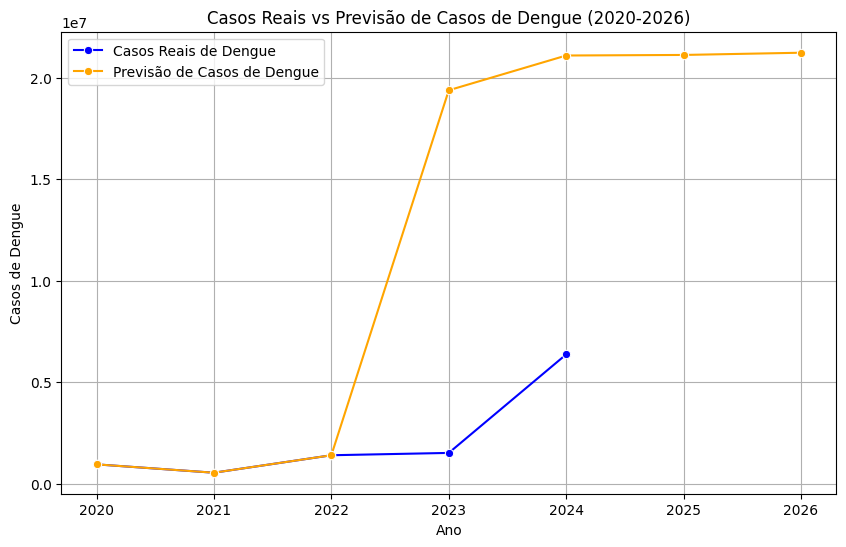

In [3]:
#!pip install pandas
#!pip install scikit-learn
#!pip install tabulate
#!pip install matplotlib seaborn


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Leitura dos arquivos CSV
dengue_cases = pd.read_csv('CasosDengue_2020-2024.csv', delimiter=';')
climate_data = pd.read_csv('Media_Climatologica_Anual_2020-2024.csv', delimiter=';')

# 2. Seleção das colunas necessárias e junção dos datasets
dengue_cases = dengue_cases[['Ano', 'Total']]
climate_data.columns = ['Ano', 'Precipitacao', 'Temperatura']

# Juntar os dois datasets com base no ano
data = pd.merge(dengue_cases, climate_data, on='Ano')

# 3. Criação de categorias/classes para o número de casos
bins = [0, 600000, 1200000, float('inf')]
labels = ['Baixo', 'Médio', 'Alto']
data['Classe_Casos'] = pd.cut(data['Total'], bins=bins, labels=labels)

# 4. Divisão dos dados de 2020 a 2022 para treinamento
train_data = data[data['Ano'] <= 2022]
test_data = data[data['Ano'] > 2022]

# Separar os dados em X (entrada) e y (saída)
X_train = train_data[['Precipitacao', 'Temperatura']]
y_train_total = train_data['Total']
y_train_class = train_data['Classe_Casos']
X_test = test_data[['Precipitacao', 'Temperatura']]
y_test_class = test_data['Classe_Casos']

# 5. Modelo de Regressão Linear (Previsão para comparação)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train_total)

# Previsão de casos usando regressão linear para 2023 e 2024
predictions_linear = regression_model.predict(X_test)

# 6. RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_class)

# Previsão usando RandomForestClassifier
y_pred_rf = rf_model.predict(X_test)

# 7. KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train_class)

# Previsão usando KNeighborsClassifier
y_pred_knn = knn_model.predict(X_test)

# 8. Calcular acurácia dos classificadores
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)

# Exibir relatórios de classificação
print(f"Acurácia RandomForestClassifier: {accuracy_rf * 100:.2f}%")
print(f"Acurácia KNeighborsClassifier: {accuracy_knn * 100:.2f}%")
print("\nRelatório de Classificação - RandomForestClassifier:")
print(classification_report(y_test_class, y_pred_rf))
print("\nRelatório de Classificação - KNeighborsClassifier:")
print(classification_report(y_test_class, y_pred_knn))

# 9. Adicionar dados futuros para 2025 e 2026 (com estimativas)
future_data = pd.DataFrame({
    'Ano': [2025, 2026],
    'Precipitacao': [113.0, 112.0],  # Estimativa
    'Temperatura': [23.5, 23.3]      # Estimativa
})

# Combinar os dados de teste (2023 e 2024) com os futuros (2025 e 2026)
test_data_extended = pd.concat([test_data[['Ano', 'Precipitacao', 'Temperatura']], future_data])

# Previsão de casos de dengue para 2023 a 2026 usando regressão linear
X_test_extended = test_data_extended[['Precipitacao', 'Temperatura']]
predictions_extended = regression_model.predict(X_test_extended)

# 10. Gerar tabela de previsões de 2020 a 2026
result_table = pd.DataFrame({
    'Ano': test_data_extended['Ano'],
    'Previsao_Casos_Dengue_Linear': predictions_extended
})

# Adicionar os valores reais de 2020, 2021 e 2022 à tabela
for ano in [2020, 2021, 2022]:
    valor_real = data[data['Ano'] == ano]['Total'].values[0]
    result_table = pd.concat([pd.DataFrame({'Ano': [ano], 'Previsao_Casos_Dengue_Linear': [valor_real]}), result_table])

# Exibir tabela formatada
print(tabulate(result_table, headers='keys', tablefmt='grid'))

# 1. Gráfico de variação da precipitação ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Ano'], y=data['Precipitacao'], marker='o', label='Precipitação')
plt.title('Variação da Precipitação ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Precipitação (mm)')
plt.grid(True)
plt.show()

# 2. Gráfico de variação da temperatura ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Ano'], y=data['Temperatura'], marker='o', label='Temperatura')
plt.title('Variação da Temperatura ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

# 3. Gráfico de variação dos casos de dengue ao longo dos anos (Total)
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Ano'], y=data['Total'], marker='o', label='Casos de Dengue')
plt.title('Variação dos Casos de Dengue ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Casos de Dengue (Total)')
plt.grid(True)
plt.show()

# 4. Gráfico de previsão de casos de dengue (Linear Regression)
plt.figure(figsize=(10, 6))
sns.lineplot(x=result_table['Ano'], y=result_table['Previsao_Casos_Dengue_Linear'], marker='o', label='Previsão de Casos de Dengue (Regressão Linear)')
plt.title('Previsão de Casos de Dengue - 2020 a 2026 (Regressão Linear)')
plt.xlabel('Ano')
plt.ylabel('Casos de Dengue (Previsão)')
plt.grid(True)
plt.show()

# 5. Gráfico combinado de casos reais e previsão de casos de dengue (Regressão Linear)
plt.figure(figsize=(10, 6))

# Linha para os casos reais (2020 a 2022)
sns.lineplot(x=data['Ano'], y=data['Total'], marker='o', label='Casos Reais de Dengue', color='blue')

# Linha para a previsão de casos (2023 a 2026)
sns.lineplot(x=result_table['Ano'], y=result_table['Previsao_Casos_Dengue_Linear'], marker='o', label='Previsão de Casos de Dengue', color='orange')

plt.title('Casos Reais vs Previsão de Casos de Dengue (2020-2026)')
plt.xlabel('Ano')
plt.ylabel('Casos de Dengue')
plt.grid(True)
plt.legend()  # Mostrar a legenda para distinguir as linhas
plt.show()

